In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats


Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.04G/1.06G [00:04<00:00, 219MB/s]
100% 1.06G/1.06G [00:04<00:00, 240MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [ ]:
#Generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)


validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [93]:
# normalize

def process(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [94]:
# create CNN model


model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))


model.add(Conv2D(64,kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))


model.add(Conv2D(128,kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding= 'valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))


In [95]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_12 (Ba  (None, 254, 254, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_13 (Ba  (None, 125, 125, 64)      256       
 tchNormalization)                                               
                                                      

In [96]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [97]:
history = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 72s 110ms/step - loss: 0.6250 - accuracy: 0.6400 - val_loss: 806.6879 - val_accuracy: 0.5000
Epoch 2/10
625/625 [==============================] - 71s 113ms/step - loss: 0.5160 - accuracy: 0.7472 - val_loss: 31.1551 - val_accuracy: 0.5000
Epoch 3/10
625/625 [==============================] - 69s 110ms/step - loss: 0.4107 - accuracy: 0.8129 - val_loss: 428.3253 - val_accuracy: 0.5000
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3122 - accuracy: 0.8641 - val_loss: 810.7731 - val_accuracy: 0.5000
Epoch 5/10
625/625 [==============================] - 68s 109ms/step - loss: 0.2116 - accuracy: 0.9141 - val_loss: 4222.8994 - val_accuracy: 0.5000
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.1247 - accuracy: 0.9515 - val_loss: 799.9975 - val_accuracy: 0.5000
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.0830 - accuracy: 0.9708 - val_loss: 370

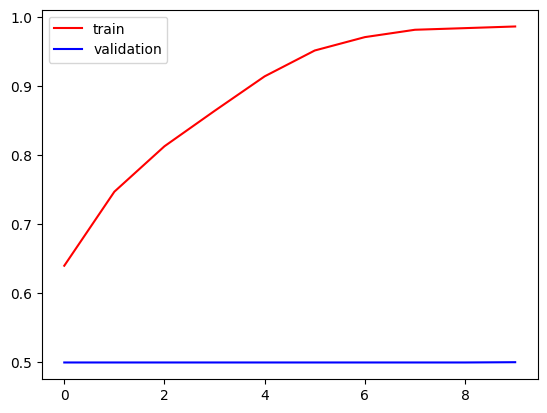

In [98]:
 import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

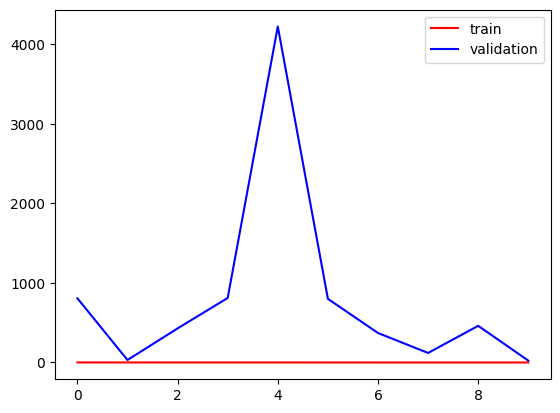

In [99]:
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

In [100]:
import cv2
import matplotlib.pyplot as plt

In [114]:
test_img = cv2.imread('/content/cat.jpg')

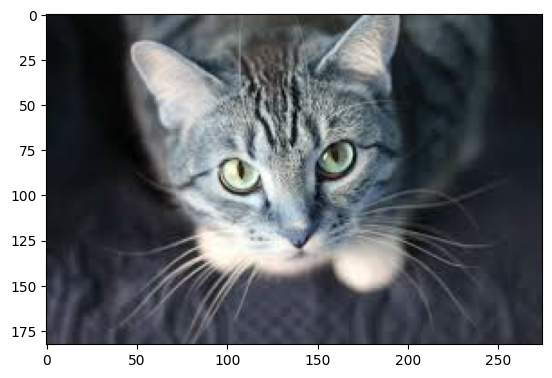

In [115]:
plt.imshow(test_img)

In [116]:
test_img.shape

(183, 275, 3)

In [117]:
test_img = cv2.resize(test_img, (256, 256))

In [118]:
test_input = test_img.reshape((1,256,256,3))

In [119]:
model.predict(test_input)

1/1 [==============================] - 0s 32ms/step


array([[1.]], dtype=float32)